In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014 
   
3. Past Usage: 

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
   The zip file includes two datasets: 
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   Input variables:
   # bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- 5 - default: has credit in default? (categorical: "no","yes","unknown")
- 6 - housing: has housing loan? (categorical: "no","yes","unknown")
- 7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: "cellular","telephone") 
- 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
-  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
-  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
-  14 - previous: number of contacts performed before this campaign and for this client (numeric)
-  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
-  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
-  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
-  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
-  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
-  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  - 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

   # note 
- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.
- These missing values can be treated as a possible class label or using deletion or imputation techniques.

<h1> 1. Tiền xử lý dữ liệu

In [7]:
df.shape
# dữ liệu có 41188 dòng và 21 cột 

(41188, 21)

In [8]:
df_shape1 = df.shape[0]

In [9]:
df.info()
# dữ liệu hiên có 3 dạng là int64, object và float65

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# Kiểm tra trùng lặp dữ liệu 
num_dup = df.shape[0] - df.drop_duplicates().shape[0]
num_dup

12

In [11]:
# Dữ liệu có 12 quan sát trùng, vì vậy quyết định loại bỏ đi.
df.drop_duplicates(inplace=True)

In [12]:
# Kiểm tra số lượng dữ liệu khuyết thiếu 
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
# Có thể thấy rằng dữ liệu không bị khuyết thiếu, tuy nhiên có 1 vài quan sát trong dữ liệu là "unknown" vì vậy đây là khuyết thiếu trong bộ dữ liệu.
(df == 'unknown').sum(axis = 0)

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

,unknown,Percent
default,8596,0.208762
education,1730,0.042015
housing,990,0.024043
loan,990,0.024043
job,330,0.008014
marital,80,0.001943
age,0,0.000000
poutcome,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


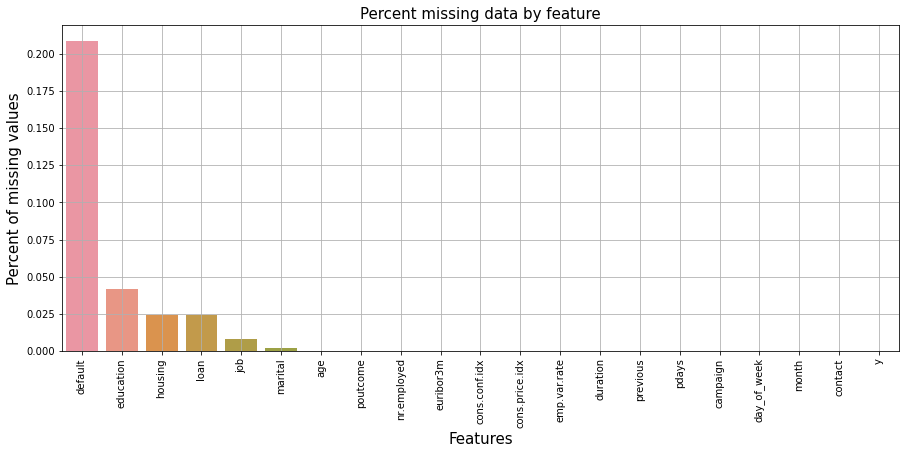

In [14]:
df1 = (df == 'unknown')
# Nhìn dữ trên có thể thấy rằng rất nhiều cột có dữ liệu là unknown
unknown = df1.sum().sort_values(ascending=False)
percent = (df1.sum()/df.isnull().count()).sort_values()
# phần trăm khuyết = số lượng khuyết / tổng số dòng.
unknown_data = pd.concat([unknown, percent], axis=1, keys=['unknown', 'Percent'])

# Visualization unknown data
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=unknown_data.index, y=unknown_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.grid()
unknown_data


In [15]:
# Nhận xét: có thể thấy rằng giá trị unknown cao nhất là ở quan sát defauit với hơn 20%, các quan sát còn lại không đáng kể

<h1> Quan sát dữ liệu xuất hiện unknown

#### default

In [16]:
df[['default']].value_counts()
# theo định nghĩa thì default hiểu đơn giản là không đáp ứng đủ các điều kiện của khoản vay. Trong trường hợp này có
# 8596 khách hàng không rõ là có đáp ứng đủ hay không ( chưa kiểm định ), 32577 khách hàng đáp ứng đủ điều kiện và 3 khách hàng là không
# quyết định đổi unknown thành ' undefined' 

default
no         32577
unknown     8596
yes            3
dtype: int64

In [17]:
df['default'].replace('unknown', 'undefined', inplace = True)

In [18]:
df['default'].value_counts()

no           32577
undefined     8596
yes              3
Name: default, dtype: int64

#### Education

In [19]:
df['education'].value_counts()
# Theo nghiên cứu ảnh hưởng nhân khẩu học đến hành vi dùng thẻ tín dụng và gửi tín dụng ngân hàng của 
# ThS. NGUYỄN CAO QUANG NHẬT (Cao đẳng Công nghệ và Quản trị Sonadezi) và ThS. BÙI VĂN THỤY (Trường Đại học Lạc Hồng)
# đã chỉ ra rằng trình độ học vấn có ảnh hưởng nhất định nhưng không đáng kể đến hành vi dùng thẻ tín dụng và gửi tín dụng ngân hàng của khách hàng
# => những giá trị unknown trong quan sát này quyết định bỏ đi để không làm nhiễu đến kết quả của bài dự báo.
# https://tapchicongthuong.vn/bai-viet/cac-yeu-to-nhan-khau-hoc-anh-huong-den-hanh-vi-su-dung-the-tin-dung-trong-giao-dich-thuong-mai-dien-tu-98055.htm

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [20]:
df.drop(df.loc[df['education']=='unknown'].index, inplace=True)

In [21]:
df['education'].value_counts() 

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

#### Housing

In [22]:
df['housing'].value_counts()
# housing loan ảnh hưởng đến việc đăng ký gửi tiền, quyết định thay thế unknown bằng undefinded

yes        20696
no         17800
unknown      950
Name: housing, dtype: int64

In [23]:
df['housing'].replace('unknown', 'undefined', inplace = True) 

In [24]:
df['housing'].value_counts()

yes          20696
no           17800
undefined      950
Name: housing, dtype: int64

#### loan

In [25]:
df['loan'].value_counts()
# tương tự với khoảng vay cá nhân
df['loan'].replace('unknown', 'undefined', inplace = True) 

#### job, marital

In [26]:
df['job'].value_counts()
# số lượng job và marital không xác định nhỏ nên quyết định bỏ đi 
df.drop(df.loc[df['job']=='unknown'].index, inplace=True)
df.drop(df.loc[df['marital']=='unknown'].index, inplace=True)


## summary

In [27]:
df_shape2 = df.shape[0]

In [28]:
print('dữ liệu còn lại: ', (df_shape2/df_shape1*100),'%')

dữ liệu còn lại:  95.12479362921239 %


<h1> 2. data visualization

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [30]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.001615,0.005511,-0.037759,0.027859,-0.002883,-0.000967,0.126898,0.008253,-0.020381
duration,0.001615,1.000000,-0.071420,-0.044146,0.017331,-0.026100,0.006339,-0.008020,-0.030518,-0.042335
campaign,0.005511,-0.071420,1.000000,0.051744,-0.078215,0.150013,0.127474,-0.010090,0.134109,0.142471
pdays,-0.037759,-0.044146,0.051744,1.000000,-0.581873,0.268377,0.079882,-0.089781,0.292038,0.367399
previous,0.027859,0.017331,-0.078215,-0.581873,1.000000,-0.419887,-0.207865,-0.057165,-0.451557,-0.496268
emp.var.rate,-0.002883,-0.026100,0.150013,0.268377,-0.419887,1.000000,0.775700,0.211249,0.972416,0.907728
cons.price.idx,-0.000967,0.006339,0.127474,0.079882,-0.207865,0.775700,1.000000,0.070266,0.689928,0.524571
cons.conf.idx,0.126898,-0.008020,-0.010090,-0.089781,-0.057165,0.211249,0.070266,1.000000,0.292110,0.114842
euribor3m,0.008253,-0.030518,0.134109,0.292038,-0.451557,0.972416,0.689928,0.292110,1.000000,0.945242
nr.employed,-0.020381,-0.042335,0.142471,0.367399,-0.496268,0.907728,0.524571,0.114842,0.945242,1.000000


<h1> Phân loại các quan sát thành biến số và biến phân loại

In [31]:
num_colmuns = []
cat_columns = []
for name, type in dict(df.dtypes).items():
        if type =='int64' or type == 'float64':
            num_colmuns.append(name)
        else:
            cat_columns.append(name)       

[Text(0, 0, 'age'),
 Text(0, 1, 'duration'),
 Text(0, 2, 'campaign'),
 Text(0, 3, 'pdays'),
 Text(0, 4, 'previous'),
 Text(0, 5, 'emp.var.rate'),
 Text(0, 6, 'cons.price.idx'),
 Text(0, 7, 'cons.conf.idx'),
 Text(0, 8, 'euribor3m'),
 Text(0, 9, 'nr.employed')]

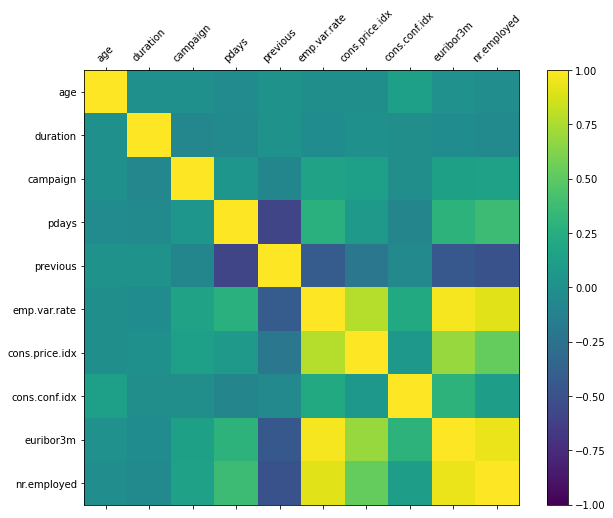

In [32]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(num_colmuns, rotation = 45)
ax.set_yticklabels(num_colmuns)

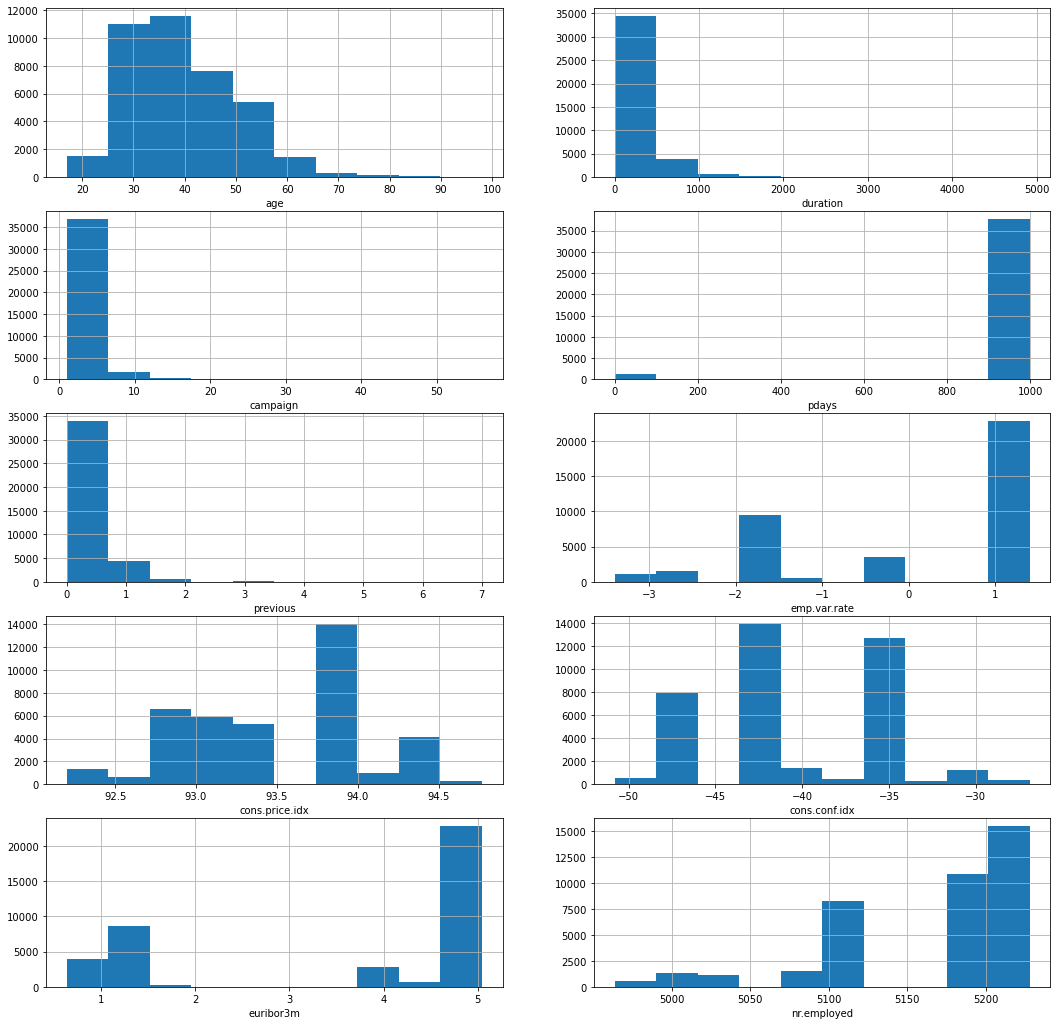

In [33]:
fig = plt.figure(figsize=(18,18))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = df[num_colmuns[r]].hist()
    ax.set_xlabel(num_colmuns[r])

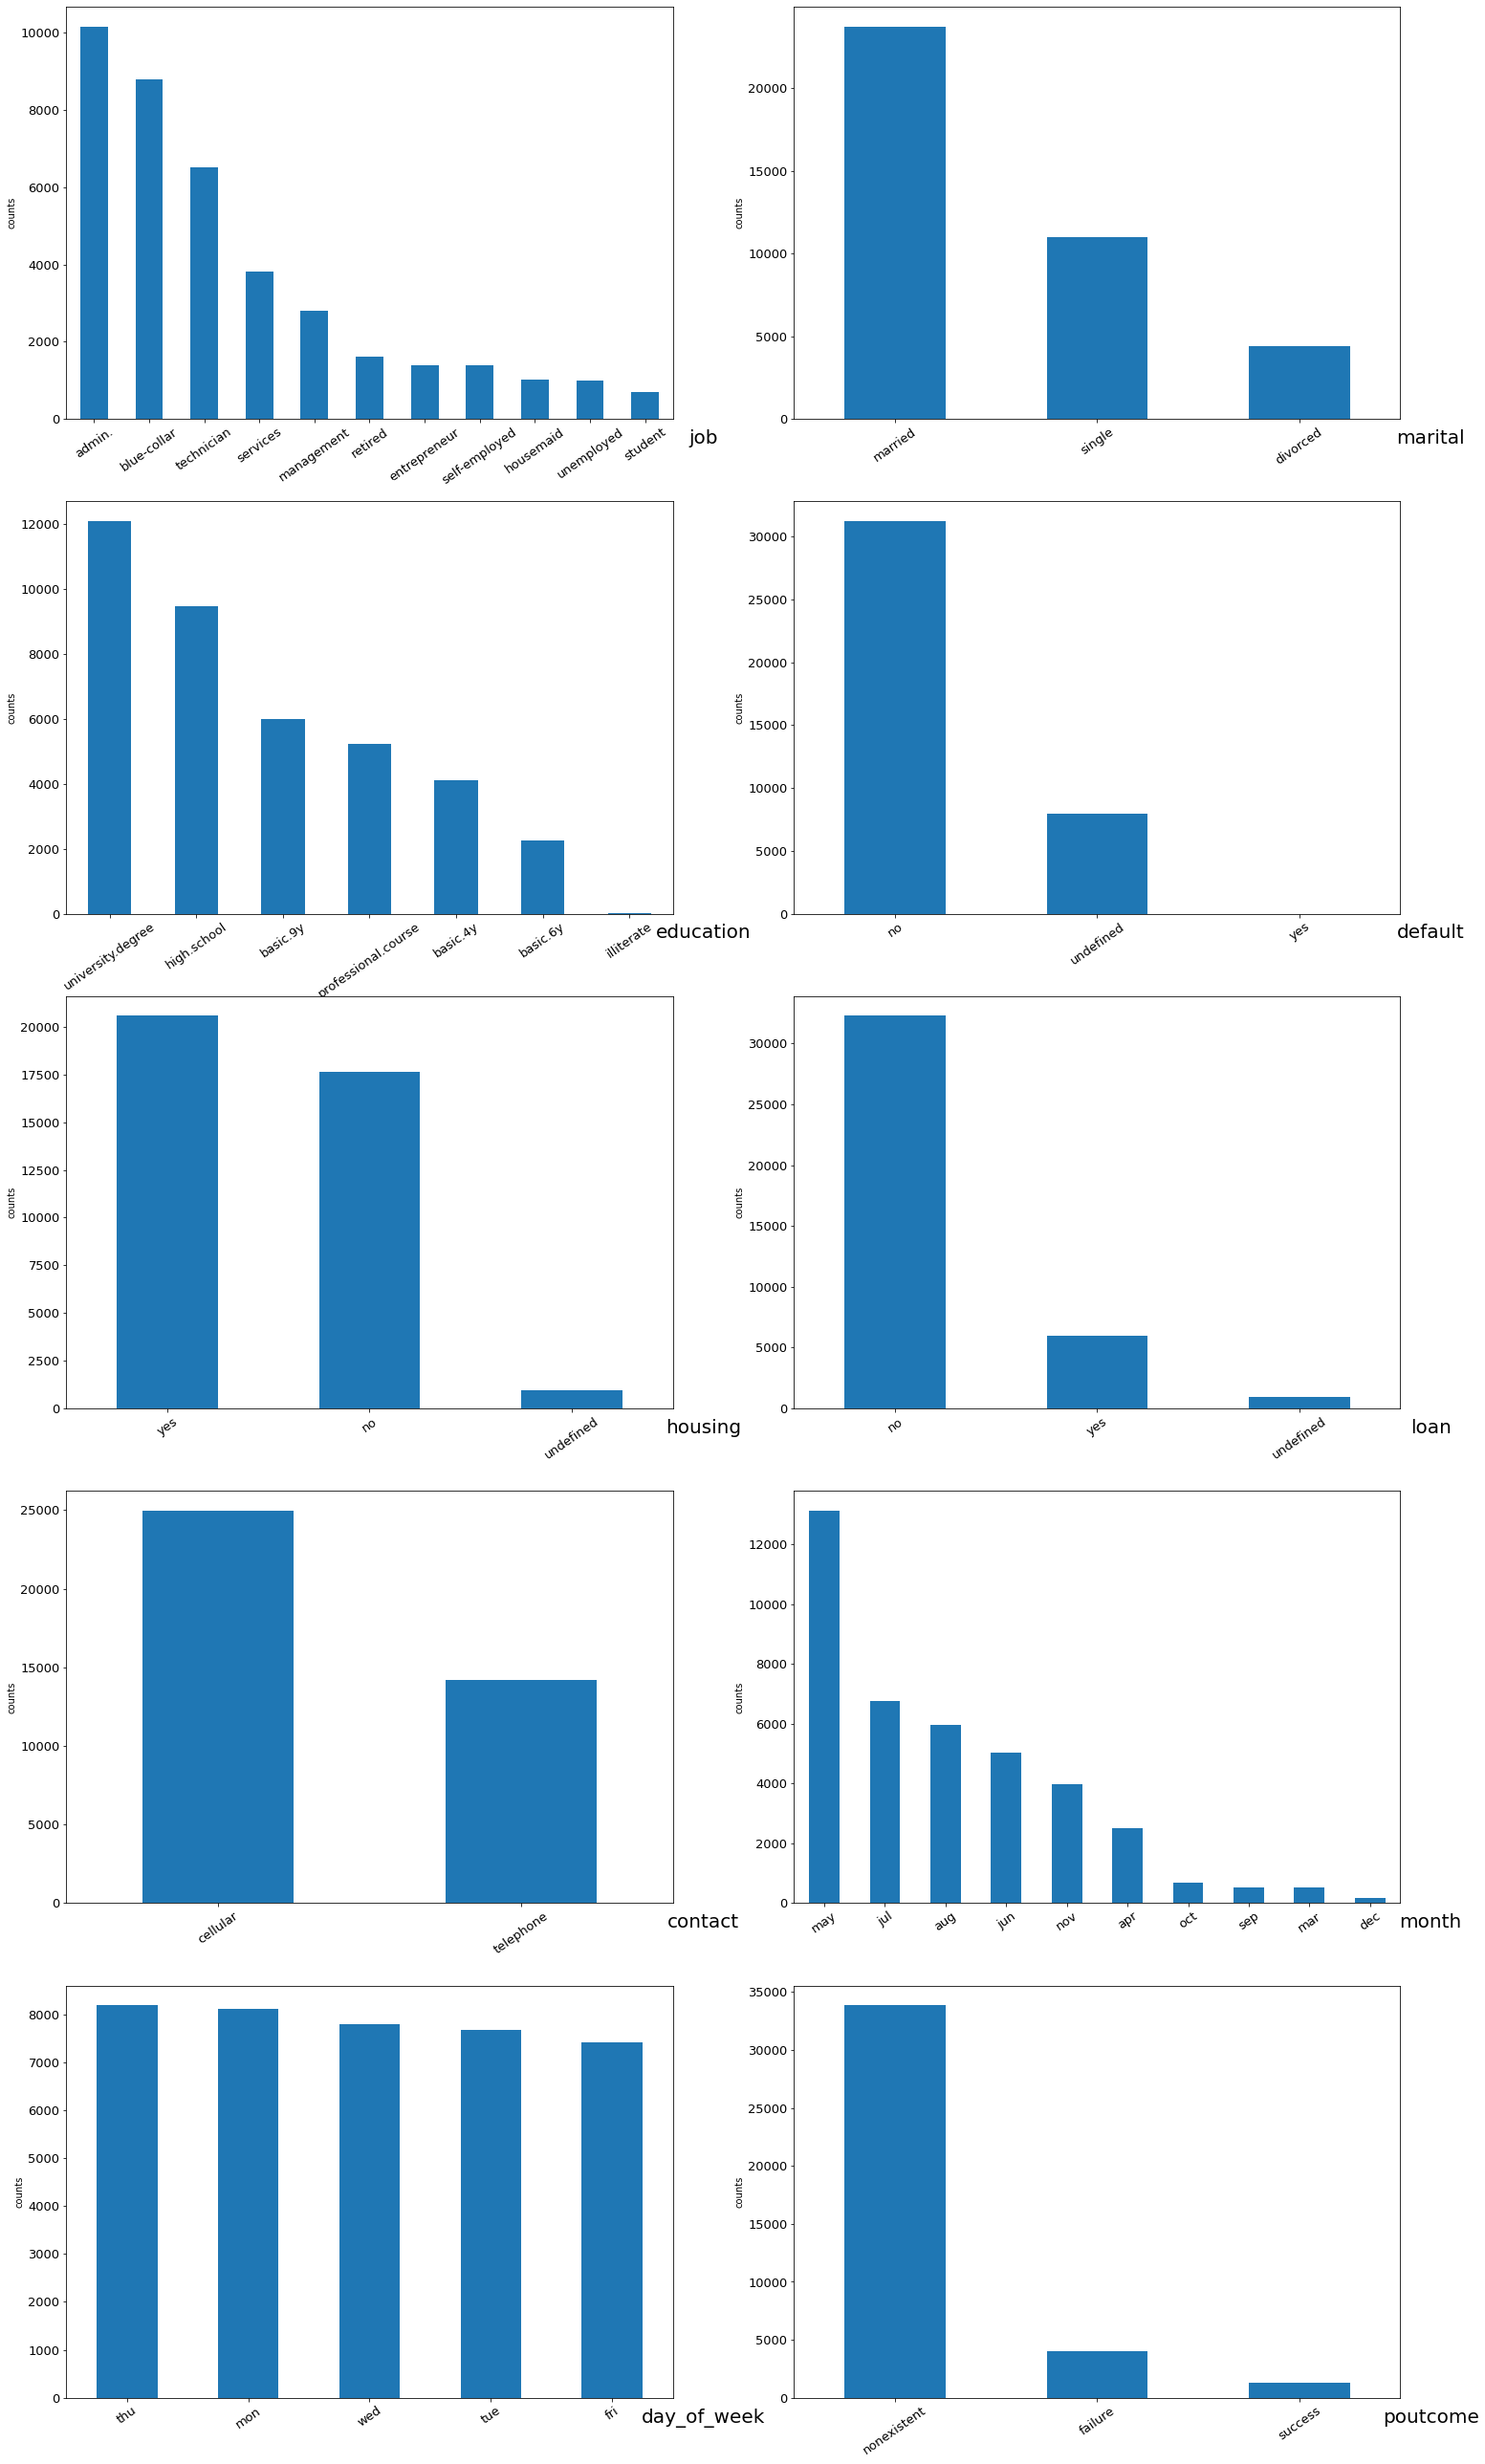

In [34]:
fig = plt.figure(figsize=(25,46))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = df[cat_columns[r]].value_counts().plot(kind = 'bar', rot=35, fontsize = 13)
    ax.set_xlabel(cat_columns[r],fontsize = 20)
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax.set_ylabel('counts')

In [35]:
# visualization y

<AxesSubplot:>

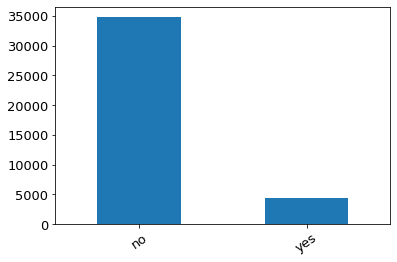

In [36]:
df['y'].value_counts().plot(kind = 'bar', rot=35, fontsize = 13)

In [37]:
# nhận thấy rằng yes và no chênh lệnh nhau nhiều, sẽ ảnh hưởng đến các mô hình sử dụng sau này.

#### Thay đổi các biến phân loại thành biến số

In [38]:
df.columns.value_counts()

age               1
campaign          1
nr.employed       1
euribor3m         1
cons.conf.idx     1
cons.price.idx    1
emp.var.rate      1
poutcome          1
previous          1
pdays             1
duration          1
job               1
day_of_week       1
month             1
contact           1
loan              1
housing           1
default           1
education         1
marital           1
y                 1
dtype: int64

In [39]:
df.drop(['month','day_of_week'], axis=1, inplace=True)
df = df.drop(['duration'], axis = 1)

In [40]:
# Biến mục tiêu để dự báo là y
cols = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'poutcome']
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n') 

job :
admin.           10156
blue-collar       8787
technician        6516
services          3812
management        2798
retired           1616
entrepreneur      1396
self-employed     1387
housemaid         1015
unemployed         990
student            707
Name: job, dtype: int64 

marital :
married     23742
single      11022
divorced     4416
Name: marital, dtype: int64 

education :
university.degree      12092
high.school             9461
basic.9y                6006
professional.course     5222
basic.4y                4118
basic.6y                2263
illiterate                18
Name: education, dtype: int64 

default :
no           31214
undefined     7963
yes              3
Name: default, dtype: int64 

housing :
yes          20573
no           17661
undefined      946
Name: housing, dtype: int64 

loan :
no           32275
yes           5959
undefined      946
Name: loan, dtype: int64 

contact :
cellular     24974
telephone    14206
Name: contact, dtype: int64 

poutcome :


In [41]:
# Phân loại các thang do dữ liệu
nominal = ['job','marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
ordinal = ['education']

In [42]:
# Chuyển thang đo nominal sang các biến dummies
dummies = pd.get_dummies(df[nominal])
forcast = pd.concat([df, dummies],axis=1).drop(nominal, axis=1)

In [43]:
# Education, thay thế các khóa học basic1,2,3,4 thành basic, và chuyển thành thang đo 0,1,2,3,4,5 cho các khóa học từ thấp đến cao
forcast['education'] = forcast['education'].replace(['basic.4y','basic.6y','basic.9y'], 'basic')

mapping_dict = {
    "education": {
        "university.degree": 5,
        "professional.course": 4,
        "basic": 3,
        "high.school": 2,
        "illiterate": 1,
    }
}
forcast = forcast.replace(mapping_dict)

In [44]:
# Chuyển đối giá trị trong y thành 0,1 tương ứng với khác hàng không, có đăng ký gửi kỳ hạn
mapping_dict_y = {
    "y": {
        "yes": 1,
        "no": 0,
    }
}
forcast = forcast.replace(mapping_dict_y)

In [45]:
forcast['y'].value_counts()

0    34821
1     4359
Name: y, dtype: int64

<h1> Chuẩn bị dữ liệu chạy mô hình

In [55]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import f_oneway

In [56]:
y= forcast['y'].values
X= forcast.drop('y',axis=1).values

In [57]:
# Dùng lệnh reshape để định dạng y thành vector cột (mảng 1 cột) 
y=y.reshape(-1,1)
y.shape

(39180, 1)

In [58]:
# chia dữ liệu thành 70% huấn luyện và 30% kiểm tra
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42) 

In [60]:
reg = LinearRegression().fit(X_train, y_train)
print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept ( hệ số chặn ) =", reg.intercept_)
print("Coefficients ( hệ số góc ) =", reg.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept ( hệ số chặn ) = [-12.36655216]
Coefficients ( hệ số góc ) = [[ 0.00027211  0.00556506 -0.00160952 -0.00017644 -0.0070804  -0.09488878
   0.16592952  0.00766387  0.02269036 -0.0005174   0.00398128 -0.01273641
  -0.01309761 -0.0131282  -0.00957979  0.02466939 -0.00411278 -0.0139304
   0.04403546  0.00320848 -0.00930943 -0.00516141 -0.00195135  0.00711276
   0.01823874 -0.0018452  -0.01639354  0.00322768 -0.00548738  0.00225969
   0.00358643 -0.00548738  0.00190095  0.05378071 -0.05378071 -0.08837188
  -0.0236701   0.11204198]]


In [61]:
pred = reg.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_percentage_error(y_test, pred)) 

0.08053795760562507
374430269992351.4


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [63]:
## cây quyết định
regressor = DecisionTreeRegressor(random_state = 42) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [64]:
prediction = regressor.predict(X_test)
print(mean_squared_error(y_test, prediction))
print(mean_absolute_percentage_error(y_test, prediction))

0.1560717155389182
379846737330911.3


In [65]:
## randomforest
# random forest
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_8296/3929511254.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

In [66]:
predict = regr.predict(X_test)
print(mean_squared_error(y_test, predict))
print(mean_absolute_percentage_error(y_test, predict))

0.08121283519456343
357484092410693.4


#### Có thể thấy rằng 2 mô hình linear và random forest cho ra kết tốt với sai số 0.08%